# Imports

In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

raw_train = pd.read_csv("train.csv")
raw_test = pd.read_csv("test.csv")

raw_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [3]:
print('Pclass')
print('Range: ' + str(raw_train['Pclass'].min()) + '-' + str(raw_train['Pclass'].max()))
print('Missing Values: ' + str(raw_train['Pclass'].hasnans))
print()
print('Sex')
print('Missing Values: ' + str(raw_train['Sex'].hasnans))
print()
print('Age')
print('Range: ' + str(raw_train['Age'].min()) + '-' + str(raw_train['Age'].max()))
print('Missing Values: ' + str(raw_train['Age'].hasnans))
print()
print('SibSp')
print('Range: ' + str(raw_train['SibSp'].min()) + '-' + str(raw_train['SibSp'].max()))
print('Missing Values: ' + str(raw_train['SibSp'].hasnans))
print()
print('Parch')
print('Range: ' + str(raw_train['Parch'].min()) + '-' + str(raw_train['Parch'].max()))
print('Missing Values: ' + str(raw_train['Parch'].hasnans))
print()
print('Fare')
print('Range: ' + str(raw_train['Fare'].min()) + '-' + str(raw_train['Fare'].max()))
print('Missing Values: ' + str(raw_train['Fare'].hasnans))
print()
print('Embarked')
print('Values: ' + str(raw_train['Embarked'].unique()))
print('Missing Values: ' + str(raw_train['Embarked'].hasnans))

Pclass
Range: 1-3
Missing Values: False

Sex
Missing Values: False

Age
Range: 0.42-80.0
Missing Values: True

SibSp
Range: 0-8
Missing Values: False

Parch
Range: 0-6
Missing Values: False

Fare
Range: 0.0-512.3292
Missing Values: False

Embarked
Values: ['S' 'C' 'Q' nan]
Missing Values: True


# Preprocessing

In [4]:
def transform(data):
  pclass1 = data['Pclass'].map({1:1,2:0,3:0})
  pclass2 = data['Pclass'].map({1:0,2:1,3:0})
  sex = data['Sex'].map({'male':0,'female':1,np.nan:0})
  age = data['Age'].fillna(data['Age'].mean())
  fare = data['Fare'].fillna(0)
  embarkedS = data['Embarked'].map({'S':1,'C':0,'Q':0,np.nan:1})
  embarkedC = data['Embarked'].map({'S':0,'C':1,'Q':0,np.nan:0})
  cleaned = pd.DataFrame({'Pclass1':pclass1,'Pclass2':pclass2,'Sex':sex,'Age':age,'SibSp':data['SibSp'],'Parch':data['Parch'],'Fare':fare,'EmbarkedS':embarkedS,'EmbarkedC':embarkedC})
  sc = StandardScaler();
  standardized = sc.fit_transform(cleaned)
  return standardized

transform(raw_train)

array([[-0.56568542, -0.51015154, -0.73769513, ..., -0.50244517,
         0.61583843, -0.48204268],
       [ 1.76776695, -0.51015154,  1.35557354, ...,  0.78684529,
        -1.62380254,  2.0745051 ],
       [-0.56568542, -0.51015154,  1.35557354, ..., -0.48885426,
         0.61583843, -0.48204268],
       ...,
       [-0.56568542, -0.51015154,  1.35557354, ..., -0.17626324,
         0.61583843, -0.48204268],
       [ 1.76776695, -0.51015154, -0.73769513, ..., -0.04438104,
        -1.62380254,  2.0745051 ],
       [-0.56568542, -0.51015154, -0.73769513, ..., -0.49237783,
        -1.62380254, -0.48204268]])

# Model

In [9]:
def distance(rows,data):
  d = transform(data)
  r = transform(rows)
  return euclidean_distances(r,d)

In [56]:
def mins(row,n):
  l = []
  for r in range(len(row)):
    i = 0
    if len(l) == 0:
      l.append([row[0],0])
    else:
      while i < len(l):
        if row[r] <= l[i][0]:
          i += 1
        else:
          break
      if i <= n:
        l.insert(i,[row[r],r])
      if len(l) > n:
        l.pop(0)
  return l

In [58]:
mins([1,3,7,2,9,6],3)

[[3, 1], [2, 3], [1, 0]]

In [59]:
data = [[0,0,1,0,0,0],
        [0,0,0,0,0,0],
        [0,0,1,0,1,0]]
rows = [[0,0,0,0,0,0],
        [0,0,1,0,0,0],]
dists = euclidean_distances(rows,data)
dists

array([[1.        , 0.        , 1.41421356],
       [0.        , 1.        , 1.        ]])

In [61]:
for row in dists:
  print(mins(row,3))

[[np.float64(1.4142135623730951), 2], [np.float64(1.0), 0], [np.float64(0.0), 1]]
[[np.float64(1.0), 1], [np.float64(1.0), 2], [np.float64(0.0), 0]]


In [94]:
def predict(input,data,n):
  survived = data['Survived']
  distances = distance(input,data)
  labels = [[(survived[x[1]]*np.exp(-1*x[0]),np.exp(-1*x[0])) for x in mins(row,n)] for row in distances]
  weights = [[label[1] for label in x] for x in labels]
  weight = [sum(w) for w in weights]
  sums = [[label[0] for label in x] for x in labels]
  su = [sum(s) for s in sums]
  output = [1 if su[i]/weight[i] > .5 else 0 for i in range(len(labels))]

  return output

In [133]:
x = 800
predict(raw_train.loc[x:x+5],raw_train.head(),2)

[0, 1, 1, 1, 0, 0]

# Evaluation

In [162]:
train_num = int(len(raw_train)*.6)
shuffled = raw_train.sample(frac=1,replace=False).reset_index(drop=True)
train = shuffled.loc[:train_num]
val = shuffled.loc[train_num+1:]

indices = [i for i in range(1,101)]

for n in indices:
  val['Predict'+str(n)] = predict(val,train,n)
  val['Acc'+str(n)] = val['Predict'+str(n)] == val['Survived']

/tmp/ipython-input-1233042689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predict'+str(n)] = predict(val,train,n)
/tmp/ipython-input-1233042689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Acc'+str(n)] = val['Predict'+str(n)] == val['Survived']
/tmp/ipython-input-1233042689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

<Axes: >

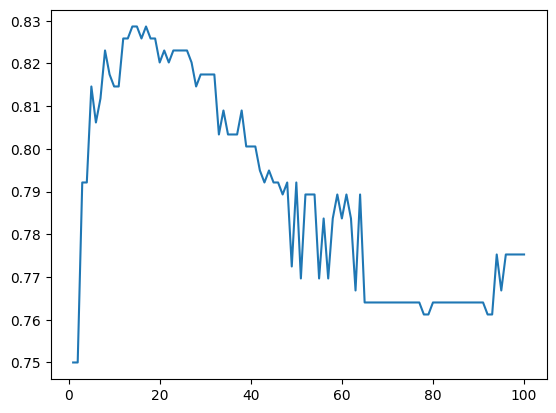

In [163]:
acc = [val['Acc'+str(i)].map({True:1,False:0}).mean() for i in indices]
results = pd.DataFrame(data=acc,index=indices)
results.plot.line(legend=False)

# Prediction

In [169]:
out = pd.DataFrame({'PassengerId':raw_test['PassengerId'],'Survived':predict(raw_test,raw_train,20)})
out.to_csv('KNN.csv',index=False)
out

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
